In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
jobs = pd.read_csv('ds_med_list.csv')
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$70K-$116K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
1,Data Scientist,$70K-$116K (Glassdoor est.),"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System\r\n3.6,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1
2,Data & Analytics Consultant,$70K-$116K (Glassdoor est.),WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI\r\n4.6,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,Consulting,Business Services,$50 to $100 million (USD),-1
3,R&D Scientist,$70K-$116K (Glassdoor est.),"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\r\n3.9,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),"Ecolab, Eurofin Private Investment Office"
4,Data Scientist,$70K-$116K (Glassdoor est.),Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet\r\n3.1,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,IT Services,Information Technology,$1 to $2 billion (USD),"Experian, Equifax"


In [3]:
# cleaning the data using lambda functions can also uuse regular expressions

jobs = jobs[jobs['Salary Estimate'] != -1 ]
salary = jobs['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary = salary.apply(lambda x: x.replace('K', '').replace('$',''))

jobs['Salary Estimate'] = salary
jobs['hourly'] = jobs['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
jobs['min_salary'] = jobs['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
jobs['max_salary'] = jobs['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
jobs['avg_salary'] =(jobs.min_salary + jobs.max_salary)/2
jobs['city'] = jobs['Location'].str.split(',', expand=True)[0]
jobs['state'] = jobs['Location'].str.split(',', expand=True)[1]
jobs['Company Name'] = jobs['Company Name'].apply(lambda x: x.split('\n')[0])
jobs['same_state'] = jobs.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)
jobs['company_age'] = jobs['Founded'].apply(lambda x: x if x<1 else 2020-x)
jobs['num_competitors'] = jobs['Competitors'].apply(lambda x: len(x.split(',')) if x !='-1' else 0)

jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,hourly,min_salary,max_salary,avg_salary,city,state,same_state,company_age,num_competitors
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,-1,0,70,116,93.0,Chantilly,VA,0,52,0
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System\r,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,-1,0,70,116,93.0,Boston,MA,1,-1,0
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI\r,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,-1,0,70,116,93.0,Cincinnati,OH,1,28,0
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\r,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,"Ecolab, Eurofin Private Investment Office",0,70,116,93.0,New Castle,DE,0,-1,2
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet\r,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,"Experian, Equifax",0,70,116,93.0,Austin,TX,0,179,2


In [4]:
# creating tags for keywords in job titles

def title_keywords(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    else:
        return 'other'
    
def job_level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'experienced' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Experienced'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower() or 'entry' in title.lower() or 'early' in title.lower():
        return 'Associate/Jr. Level'
    else:
        return 'none'

In [5]:
jobs['job_tag'] = jobs['Job Title'].apply(title_keywords)
jobs['job_level'] = jobs['Job Title'].apply(job_level)

In [6]:
jobs.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,city,state,same_state,company_age,num_competitors,job_tag,job_level
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,70,116,93.0,Chantilly,VA,0,52,0,data scientist,none
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System\r,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,70,116,93.0,Boston,MA,1,-1,0,data scientist,none
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI\r,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,70,116,93.0,Cincinnati,OH,1,28,0,other,none
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\r,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,70,116,93.0,New Castle,DE,0,-1,2,other,none
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet\r,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,70,116,93.0,Austin,TX,0,179,2,data scientist,none


In [7]:
# cleaning and mapping our state columns
display(jobs.state.unique())
jobs.drop(jobs[jobs['state'] == ' Arapahoe'].index, inplace=True)
jobs['state'] = jobs['state'].str.lstrip()
jobs.state.unique()

array([' VA', ' MA', ' OH', ' DE', ' TX', ' CA', ' NE', ' MD', ' DC',
       ' WA', None, ' NY', ' WI', ' PA', ' NC', ' FL', ' IL', ' KY',
       ' AL', ' NJ', ' MI', ' MO', ' MN', ' KS', ' AR', ' CO', ' TN',
       ' LA', ' AZ', ' IA', ' GA', ' UT', ' PR', ' NM', ' CT',
       ' Arapahoe'], dtype=object)

array(['VA', 'MA', 'OH', 'DE', 'TX', 'CA', 'NE', 'MD', 'DC', 'WA', None,
       'NY', 'WI', 'PA', 'NC', 'FL', 'IL', 'KY', 'AL', 'NJ', 'MI', 'MO',
       'MN', 'KS', 'AR', 'CO', 'TN', 'LA', 'AZ', 'IA', 'GA', 'UT', 'PR',
       'NM', 'CT'], dtype=object)

In [9]:
state_mapping = pd.read_csv('csv_files/census_states_region_division.csv')

def mapping(mapping_df, df, mapping, key):  
    for col in mapping_df.drop(key, axis=1).columns: # splits our mapping csv mroe granularly based on state code
        temp = mapping_df[[key, col]].set_index(key)[col].to_dict()
        # we can now map each new column to our main dataframe
        df[col] = df[mapping].map(temp)
#     return temp, df

mapping(state_mapping, jobs, 'state', 'State Code' )
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,city,state,same_state,company_age,num_competitors,job_tag,job_level,State,Region,Division
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,Chantilly,VA,0,52,0,data scientist,none,Virginia,South,South Atlantic
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System\r,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,Boston,MA,1,-1,0,data scientist,none,Massachusetts,Northeast,New England
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI\r,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,Cincinnati,OH,1,28,0,other,none,Ohio,Midwest,East North Central
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\r,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,New Castle,DE,0,-1,2,other,none,Delaware,South,South Atlantic
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet\r,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,Austin,TX,0,179,2,data scientist,none,Texas,South,West South Central


In [10]:
# mapping state longitude and latitude info to the dataframe

long_lat = pd.read_csv('csv_files/statelatlong.csv')
mapping(long_lat.drop('City', axis=1), jobs, 'state', 'State')
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,company_age,num_competitors,job_tag,job_level,State,Region,Division,Latitude,Longitude
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,52,0,data scientist,none,Virginia,South,South Atlantic,38.003386,-79.458786
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System\r,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,1,-1,0,data scientist,none,Massachusetts,Northeast,New England,42.062940,-71.718067
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI\r,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,1,28,0,other,none,Ohio,Midwest,East North Central,40.190362,-82.669252
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\r,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,0,-1,2,other,none,Delaware,South,South Atlantic,39.145251,-75.418921
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet\r,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,0,179,2,data scientist,none,Texas,South,West South Central,31.169336,-100.076842


In [11]:
jobs.Division.unique()

array(['South Atlantic', 'New England', 'East North Central',
       'West South Central', 'Pacific', 'West North Central', nan,
       'Middle Atlantic', 'East South Central', 'Mountain'], dtype=object)

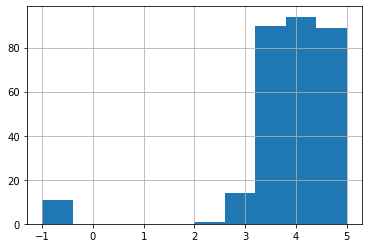

In [12]:
jobs.Rating.hist()

In [13]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # cleaning our job description col
# def remove_punct(text):
#     words_tokenized = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     for word in word_tokens:
#         if word not in stop_words and word.isalpha():
#             words_tokenized.append(word.lower())
#     return(words_tokenized)

# words = ' '.join(jobs['Job Description'])
# words = remove_punct(words)


In [14]:
# text = ' '.join(word for word in words)  # creating large block of words for wordcloud

# wc = WordCloud(stopwords=STOPWORDS, width=1600, height=1600)
# wc.generate(text)

# plt.figure(figsize=(10,10))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [15]:
jobs.to_csv('csv_files/cleaned_list.csv', index=False)